<a href="https://colab.research.google.com/github/Ziedny28/ML/blob/master/week-12/tugas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas
## Mendeteksi orientasi teks dan jenis skrip
Tugas ini bertujuan untuk mendeteksi orientasi teks dan jenis skrip yang digunakan dalam suatu gambar menggunakan tesseract.
## Tugas:
1. Persiapan Gambar:
Gunakan gambar contoh yang disediakan ('hitchhikers-rotated.png').
Tampilkan gambar asli menggunakan Python dan OpenCV.

2. Deteksi Orientasi dan Skrip:
Implementasikan skrip Python untuk mendeteksi orientasi teks dalam gambar.
Gunakan Tesseract untuk mendapatkan sudut rotasi (angle) dan jenis skrip (script).
Tampilkan hasil orientasi dan jenis skrip.

## Jawaban

### Instalasi Liblary

In [14]:
!sudo apt install tesseract-ocr
!pip install pytesseract
!pip install opencv-python

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 9 not upgraded.


### Import Liblary

In [15]:
import re
import cv2
import numpy as np
import pytesseract
from pytesseract import Output
from matplotlib import pyplot as plt

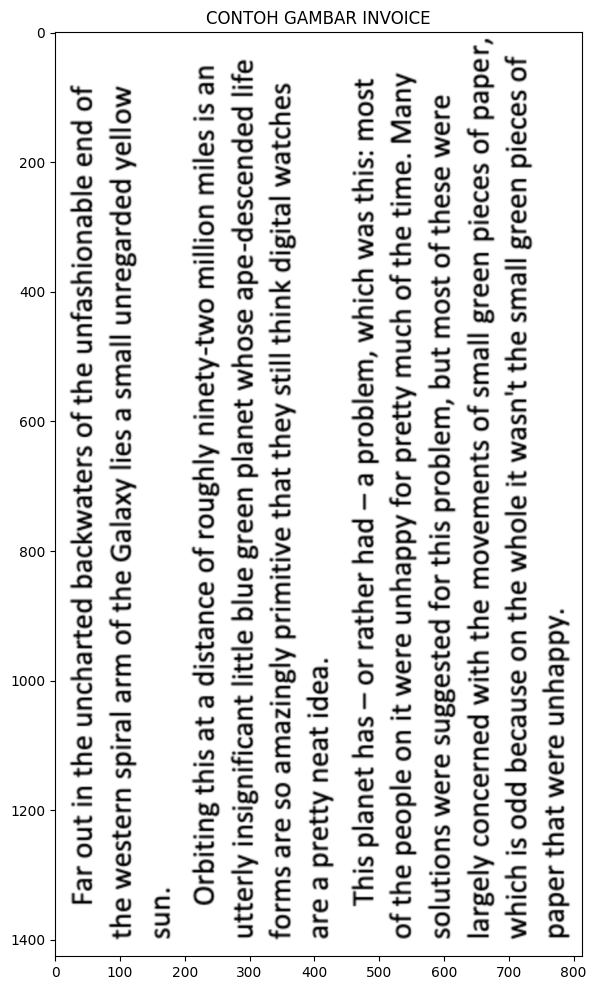

In [16]:
# Plot gambar original

# Membaca gambar dari direktori
img = cv2.imread('hitchhikers-rotated.png')

# Memisahkan saluran warna (blue, green, red) karena matplotlib menggunakan skema warna RGB
b, g, r = cv2.split(img)
rgb_img = cv2.merge([r, g, b])

# Menampilkan gambar dalam ukuran tertentu
plt.figure(figsize=(16, 12))
plt.imshow(rgb_img)
plt.title('CONTOH GAMBAR INVOICE')
plt.show()

### Gambar Grayscale

In [17]:
gray_image = cv2.cvtColor(rgb_img, cv2.COLOR_BGR2GRAY)

### Mendeteksi Sudut Rotasi dan Jenis Skrip



In [18]:
import subprocess
from PIL import Image
from google.colab.patches import cv2_imshow

Sudut Rotasi: 98.52347880949085 degrees
Jenis Skrip: 
Far out in the uncharted backwaters of the unfashionable end of
the western spiral arm of the Galaxy lies a small unregarded yellow
sun.

Orbiting this at a distance of roughly ninety-two million miles is an
utterly insignificant little blue green planet whose ape-descended life
forms are so amazingly primitive that they still think digital watches
are a pretty neat idea.

This planet has — or rather had — a problem, which was this: most
of the people on it were unhappy for pretty much of the time. Many
solutions were suggested for this problem, but most of these were
largely concerned with the movements of small green pieces of paper,
which is odd because on the whole it wasn't the small green pieces of
paper that were unhappy.



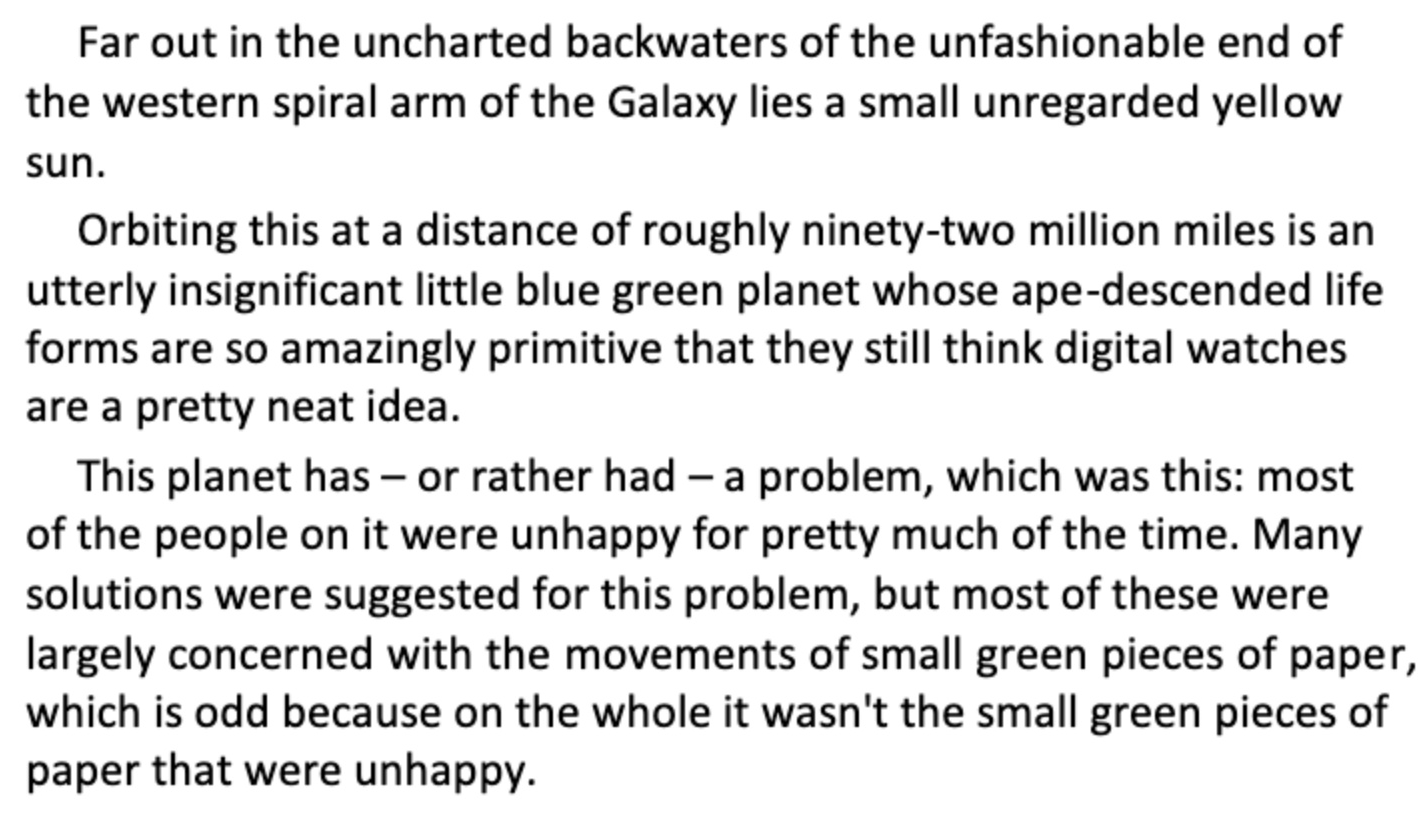

In [19]:
import cv2
import numpy as np
from PIL import Image
import pytesseract
import tempfile
import os

# Encode the NumPy array into a JPEG image format
encoded_img = cv2.imencode('.jpg', img)[1].tobytes()

# Create a temporary file for the image
with tempfile.NamedTemporaryFile(suffix='.jpg') as temp_file:
    temp_file.write(encoded_img)
    temp_file.flush()

    # Read the image from the temporary file
    temp_img_path = temp_file.name
    img = cv2.imread(temp_img_path)

    # Process the image and display results
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray_img, 50, 150, apertureSize=3)
    lines = cv2.HoughLines(edges, 1, np.pi / 180, 100)

    if lines is not None:
        angles = []
        for line in lines:
            rho, theta = line[0]
            angle = theta * (180 / np.pi)
            angles.append(angle)
        avg_angle = np.mean(angles)
    else:
        avg_angle = 0

    rotated_img = img.copy()
    if abs(avg_angle) > 1:
        rotated_img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE if avg_angle > 0 else cv2.ROTATE_90_COUNTERCLOCKWISE)
    script_type = pytesseract.image_to_string(Image.fromarray(rotated_img))

    print(f'Sudut Rotasi: {avg_angle} degrees')
    print(f'Jenis Skrip: \n{script_type}')

    cv2_imshow(rotated_img)


### Deskripsi

Pada program diatas, diterapkan teknik deteksi sudut rotasi dan pengenalan teks dalam gambar. Ini melibatkan deteksi garis menggunakan Hough Line Transform dan Optical Character Recognition (OCR) dengan Tesseract. Gambar disimpan sementara, diubah ke skala abu-abu, dan kemudian dikenai deteksi tepi.

Deteksi garis melibatkan penggunaan transformasi Hough Line, diikuti dengan perhitungan rata-rata sudut garis untuk menentukan rotasi. Jika sudut rata-rata signifikan, gambar diputar sesuai arah jarum jam atau berlawanan arah.

Setelah proses rotasi, Tesseract digunakan untuk melakukan OCR dan mengenali teks pada gambar. Hasil akhirnya adalah informasi mengenai sudut rotasi dan jenis teks yang terdeteksi.

Dengan demikian, program ini memberikan solusi terhadap deteksi sudut rotasi dan pengenalan teks dalam gambar, menggabungkan metode deteksi garis dan teknologi OCR.